 Loading MNIST CSV dataset...
Training samples: 251, Test samples: 239

 Training Logistic Regression model...

 Accuracy: 100.00%

Confusion Matrix:
 [[ 95   0]
 [  0 144]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       144

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



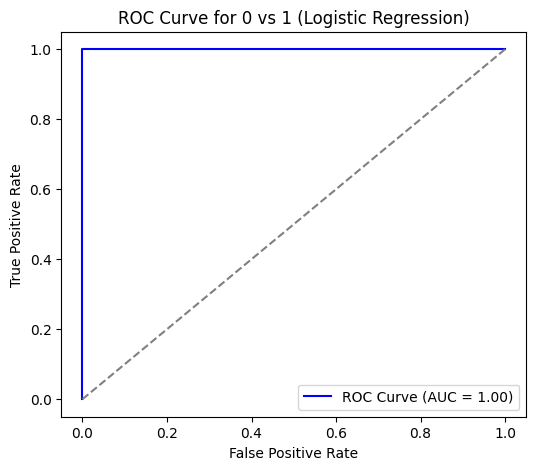

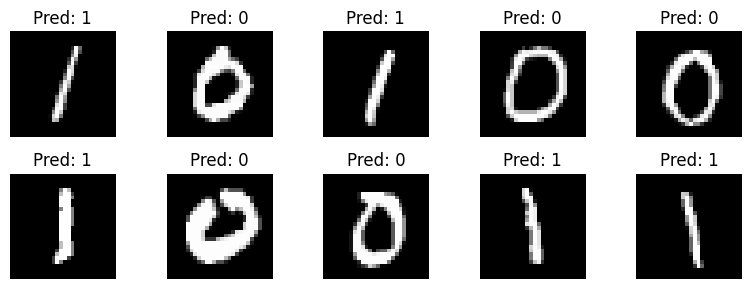

In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

print("Loading MNIST CSV dataset...")
train = pd.read_csv("/content/mnist_train.csv")
test  = pd.read_csv("/content/mnist_test.csv")

train = train[train['label'].isin([0, 1])]
test  = test[test['label'].isin([0, 1])]

X_train = train.drop('label', axis=1)
y_train = train['label']
X_test  = test.drop('label', axis=1)
y_test  = test['label']

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Step 5: Normalize pixel values (0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 8: Evaluation metrics
acc = accuracy_score(y_test, y_pred)
print(f"\n Accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for 0 vs 1 (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.reshape(X_test.iloc[i].values, (28, 28)), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
